In [1]:
path = 'F:/Traders/2x4/Adjusted CME Futures/Switch_OI'

In [2]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(path) if isfile(join(path, f))]

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Adj_close           
close               
close	Adj_close	open	Adj_open	high	Adj_high	low	Adj_low	volume	openInterest


In [4]:

f = 'Lumber.csv'
full_name = str(path+'/'+f)
idx = pd.DatetimeIndex(pd.DataFrame(pd.read_csv(full_name,index_col=0)).index).strftime('%Y-%m-%d')
futures_df = pd.DataFrame(index=idx)

In [51]:
Treasury_Terms_link = "https://www.newyorkfed.org/medialibrary/media/research/data_indicators/ACMTermPremium.xls"
Treasury_Terms = pd.read_excel(Treasury_Terms_link, sheet_name='ACM Daily', index_col=0)
Treasury_Terms.index = pd.DatetimeIndex(Treasury_Terms.index).strftime('%Y-%m-%d')
Treasury_Terms.dropna(inplace=True)
Treasury_Terms.head(1).append(Treasury_Terms.tail(1))

C:\Users\Fanjum_cwp\AppData\Local\Temp\2\ipykernel_13240\1349413046.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Treasury_Terms.head(1).append(Treasury_Terms.tail(1))


,ACMY01,ACMY02,ACMY03,ACMY04,ACMY05,ACMY06,ACMY07,ACMY08,ACMY09,ACMY10,...,ACMRNY01,ACMRNY02,ACMRNY03,ACMRNY04,ACMRNY05,ACMRNY06,ACMRNY07,ACMRNY08,ACMRNY09,ACMRNY10
DATE,,,,,,,,,,,,,,,,,,,,,
1961-06-14,2.971938,3.367541,3.551806,3.645017,3.698256,3.733251,3.759322,3.780423,3.798112,3.812862,...,2.887227,3.203769,3.354051,3.435292,3.484541,3.517325,3.540695,3.558119,3.571458,3.581798
2022-05-23,2.093576,2.639057,2.811534,2.863181,2.879586,2.888133,2.896545,2.906198,2.916585,2.926756,...,1.884076,2.397504,2.641744,2.780835,2.871942,2.938320,2.990406,3.033312,3.069767,3.101360


In [52]:
f = 'Lumber.csv'
full_name = str(path+'/'+f)
lumber_df = pd.DataFrame(pd.read_csv(full_name,index_col=0))
lumber_df.index = pd.DatetimeIndex(lumber_df.index)
lumber_df.dropna(inplace=True)

In [53]:
final_df = Treasury_Terms
final_df.head(2)

,ACMY01,ACMY02,ACMY03,ACMY04,ACMY05,ACMY06,ACMY07,ACMY08,ACMY09,ACMY10,...,ACMRNY01,ACMRNY02,ACMRNY03,ACMRNY04,ACMRNY05,ACMRNY06,ACMRNY07,ACMRNY08,ACMRNY09,ACMRNY10
DATE,,,,,,,,,,,,,,,,,,,,,
1961-06-14,2.971938,3.367541,3.551806,3.645017,3.698256,3.733251,3.759322,3.780423,3.798112,3.812862,...,2.887227,3.203769,3.354051,3.435292,3.484541,3.517325,3.540695,3.558119,3.571458,3.581798
1961-06-15,2.984165,3.403550,3.597189,3.694481,3.749884,3.786308,3.813479,3.835490,3.853956,3.869378,...,2.877777,3.206215,3.362098,3.446204,3.496969,3.530541,3.554276,3.571809,3.585093,3.595273


In [61]:
lumber_df

,close,Adj_close,open,Adj_open,high,Adj_high,low,Adj_low,volume,openInterest
dt,,,,,,,,,,
2022-05-10,1022.0,1022.000000,1008.00,1008.000000,1025.00,1025.000000,1008.0,1008.000000,53.0,0.0
2022-05-09,1009.0,1009.000000,1000.10,1000.100000,1015.00,1015.000000,975.0,975.000000,89.0,163.0
2022-05-06,1000.1,1000.100000,990.00,990.000000,1005.00,1005.000000,985.0,985.000000,147.0,237.0
2022-05-05,1020.0,1020.000000,1010.00,1010.000000,1033.40,1033.400000,993.8,993.800000,131.0,340.0
2022-05-04,1010.0,1010.000000,1021.60,1021.600000,1025.50,1025.500000,980.0,980.000000,144.0,443.0
...,...,...,...,...,...,...,...,...,...,...
1969-10-07,79.0,17095.964868,78.50,16987.762559,79.00,17095.964868,78.0,16879.560250,0.0,0.0
1969-10-06,80.0,17312.369487,80.00,17312.369487,80.50,17420.571796,80.0,17312.369487,0.0,0.0
1969-10-03,80.0,17312.369487,80.00,17312.369487,80.00,17312.369487,80.0,17312.369487,0.0,0.0


In [62]:
lumber_df = pd.DataFrame(lumber_df['Adj_close'])
final_df_ln = np.log(final_df) - np.log(final_df.shift(-1))
final_df_ln.replace([np.inf, -np.inf], np.nan, inplace=True)
final_df_ln.dropna(inplace=True)
lumber_df_ln = np.log(lumber_df) - np.log(lumber_df.shift(-1))
lumber_df_ln.replace([np.inf, -np.inf], np.nan, inplace=True)
lumber_df_ln.dropna(inplace=True)
final_df_ln.head(3)

\\VSYS-P-GW01.cloud.vsys.ca\RDFolderRedirect$\fanjum_cwp\Desktop\Python\2x4\venv\Lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,ACMY01,ACMY02,ACMY03,ACMY04,ACMY05,ACMY06,ACMY07,ACMY08,ACMY09,ACMY10,...,ACMRNY01,ACMRNY02,ACMRNY03,ACMRNY04,ACMRNY05,ACMRNY06,ACMRNY07,ACMRNY08,ACMRNY09,ACMRNY10
DATE,,,,,,,,,,,,,,,,,,,,,
1961-06-14,-0.004106,-0.010636,-0.012697,-0.013479,-0.013864,-0.014112,-0.014303,-0.014461,-0.014596,-0.014714,...,0.003278,-0.000763,-0.002396,-0.003171,-0.003560,-0.003750,-0.003829,-0.003840,-0.003810,-0.003755
1961-06-15,-0.001798,-0.000412,-0.000334,-0.000541,-0.000748,-0.000899,-0.000998,-0.001059,-0.001096,-0.001117,...,-0.002084,-0.001298,-0.000895,-0.000680,-0.000553,-0.000470,-0.000412,-0.000369,-0.000336,-0.000308
1961-06-16,0.000462,-0.006391,-0.007332,-0.006918,-0.006406,-0.006056,-0.005869,-0.005795,-0.005793,-0.005831,...,0.004737,0.001343,-0.000323,-0.001162,-0.001611,-0.001859,-0.001994,-0.002063,-0.002090,-0.002091


In [64]:

x = StandardScaler().fit_transform(final_df_ln)
y = StandardScaler().fit_transform(lumber_df_ln)
Target = pd.DataFrame(['+ve' if i > 0 else '-ve' if i < 0 else '0' for i in lumber_df_ln['Adj_close'].values])

In [65]:
Target


,0
0,+ve
1,+ve
2,-ve
3,+ve
4,-ve
...,...
13235,+ve
13236,-ve
13237,0
13238,-ve


In [71]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

In [72]:
finalDf = pd.concat([principalDf, Target], axis = 1)
finalDf.columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5', 'Target']
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Target
0,-4.736183,-7.558159,2.562247,-1.663529,0.882981,+ve
1,-0.270520,-0.268076,0.072333,-0.331935,-0.030298,+ve
2,-1.973183,-2.856601,0.903299,0.009015,0.444178,-ve
3,2.107006,3.590404,-1.315754,-0.408772,-0.170537,+ve
4,-1.225527,-0.805646,0.144591,-0.607863,0.043193,-ve


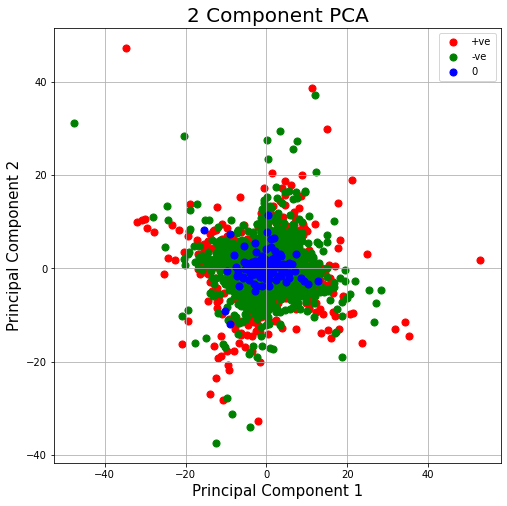

In [79]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['+ve', '-ve', '0']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

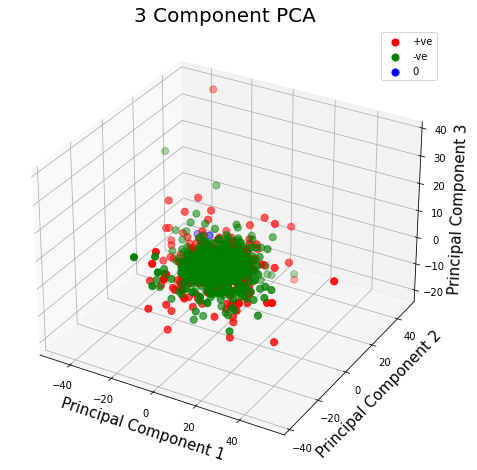

In [78]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)

targets = ['+ve', '-ve', '0']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter3D(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], finalDf.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)
ax.legend(targets)
ax.grid()


In [22]:
finalDf['principal component 1'].dropna()

0      2.069513
1      5.445386
2      0.705282
3      9.885532
4     -7.891173
         ...   
513   -1.100189
514    0.185030
515    0.925572
516   -5.038244
517   -2.496231
Name: principal component 1, Length: 518, dtype: float64

In [23]:
lumber_df.pct_change(-1).reset_index().drop('dt',axis=1)

,Lumber
0,0.012884
1,0.008899
2,-0.019510
3,0.009901
4,-0.028379
...,...
2100,0.005082
2101,0.006250
2102,-0.013453
2103,0.009907


In [24]:
pd.concat([lumber_df.pct_change(-1).reset_index().drop('dt',axis=1),finalDf['principal component 1'].dropna()],axis=1).dropna().corr()

,Lumber,principal component 1
Lumber,1.000000,-0.062712
principal component 1,-0.062712,1.000000


In [25]:
pd.concat([lumber_df.pct_change(-1).reset_index().drop('dt',axis=1),finalDf['principal component 2'].dropna()],axis=1).dropna().corr()

,Lumber,principal component 2
Lumber,1.000000,-0.060067
principal component 2,-0.060067,1.000000


In [26]:
pd.concat([lumber_df.pct_change(-1).reset_index().drop('dt',axis=1),finalDf['principal component 3'].dropna()],axis=1).dropna().corr()

,Lumber,principal component 3
Lumber,1.000000,-0.019608
principal component 3,-0.019608,1.000000


In [27]:
0.044997*100

4.4997